In [1]:
import numpy as np
# import matplotlib.pyplot as plt
# import argparse
from environment import WoodCuttingEnv
from agent import DQNAgent
from training import train_agent, evaluate_agent

/home/viettiev/projects/REL301m/venv/lib/python3.12/site-packages/torch/cuda/__init__.py:129: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at /pytorch/c10/cuda/CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0


In [ ]:
def custom_order_example():
    """Example of using a custom order."""
    # Create environment
    env = WoodCuttingEnv()
    
    # Create and load agent
    agent = DQNAgent(
        state_shape={
            'grid': env.observation_space['grid'].shape,
            'order': env.observation_space['order'].shape,
            'platform_index': (1,)
        },
        action_space=env.action_space.nvec
    )
    
    try:
        agent.load_model('models/dqn_wood_cutting_final.pth')
        print("Loaded trained model")
    except:
        print("No trained model found, using untrained agent")
    
    # Define a custom order
    # Format: [[width, height, quantity], ...]
    # custom_order = np.array([
    #     [30, 20, 5],   # 5 pieces of 30x20
    #     [25, 15, 8],   # 8 pieces of 25x15
    #     [40, 10, 3],   # 3 pieces of 40x10
    #     [0, 0, 0],     # Padding
    #     [0, 0, 0],     # Padding
    #     [0, 0, 0],     # Padding
    #     [0, 0, 0],     # Padding
    #     [0, 0, 0],     # Padding
    #     [0, 0, 0],     # Padding
    #     [0, 0, 0]      # Padding
    # ])
    custom_order = np.array([
        [40, 40, 1],   # 5 pieces of 30x20
        [60, 60, 2],   # 8 pieces of 25x15
        [40, 30, 10],   # 3 pieces of 40x10
        [0, 0, 0],     # Padding
        [0, 0, 0],     # Padding
        [0, 0, 0],     # Padding
        [0, 0, 0],     # Padding
        [0, 0, 0],     # Padding
        [0, 0, 0],     # Padding
        [0, 0, 0]      # Padding
    ])
    
    # Reset environment with custom order
    state = env.reset(order=custom_order)
    
    # Run episode with custom order
    done = False
    total_reward = 0
    steps = 0
    max_steps = 10000
    
    print("Starting custom order optimization...")
    
    while not done and steps < max_steps:
        # Choose action
        action = agent.act(state, training=False)
        
        # Take action
        next_state, reward, done, info = env.step(action)
        
        # Update state and total reward
        state = next_state
        total_reward += reward
        steps += 1
        
        if done:
            print(f"Order completed in {steps} steps")
            print(f"Total reward: {total_reward:.2f}")
            if 'waste' in info:
                print(f"Waste: {info['waste']}")
                print(f"Efficiency: {info['efficiency']:.2f}")
                print(f"Platforms used: {info['platforms_used']}")
    
    # Render final state
    env.render()
    
    if not done:
        print(f"Failed to complete order within {max_steps} steps")
    
    return total_reward

In [3]:
def main():

    train = True
    evaluate = False
    model_path = 'models/dqn_wood_cutting_final.pth'
    episodes = 1000
    platform_width = 100
    platform_height = 100
    max_platforms = 5
    render_every = 100
    custom_order = False

    if custom_order:
        custom_order_example()
        return
    
    # Create environment
    env = WoodCuttingEnv(
        big_platform_size=(platform_width, platform_height),
        max_platforms=max_platforms
    )
    
    # Create agent
    agent = DQNAgent(
        state_shape={
            'grid': env.observation_space['grid'].shape,
            'order': env.observation_space['order'].shape,
            'platform_index': (1,)
        },
        action_space=env.action_space.nvec
    )
    
    if train:
        # Train the agent
        print("Starting training...")
        train_agent(
            env=env,
            agent=agent,
            episodes=episodes,
            render_every=render_every
        )
        print("Training completed!")
    
    if evaluate:
        eval_episodes = 100
        max_step = 10000
        # Load the model if not training
        if not train:
            print(f"Loading model from {model_path}...")
            agent.load_model(model_path)
        
        # Evaluate the agent
        print("Starting evaluation...")
        evaluate_agent(
            env=env,
            agent=agent,
            max_step=max_step,
            episodes=eval_episodes
        )
        print("Evaluation completed!")


Starting training...


Training:   0%|          | 0/1000 [00:00<?, ?it/s]


Episode 0
Reward: 29348.84
Waste: 20658
Efficiency: 0.59
Platforms used: 5


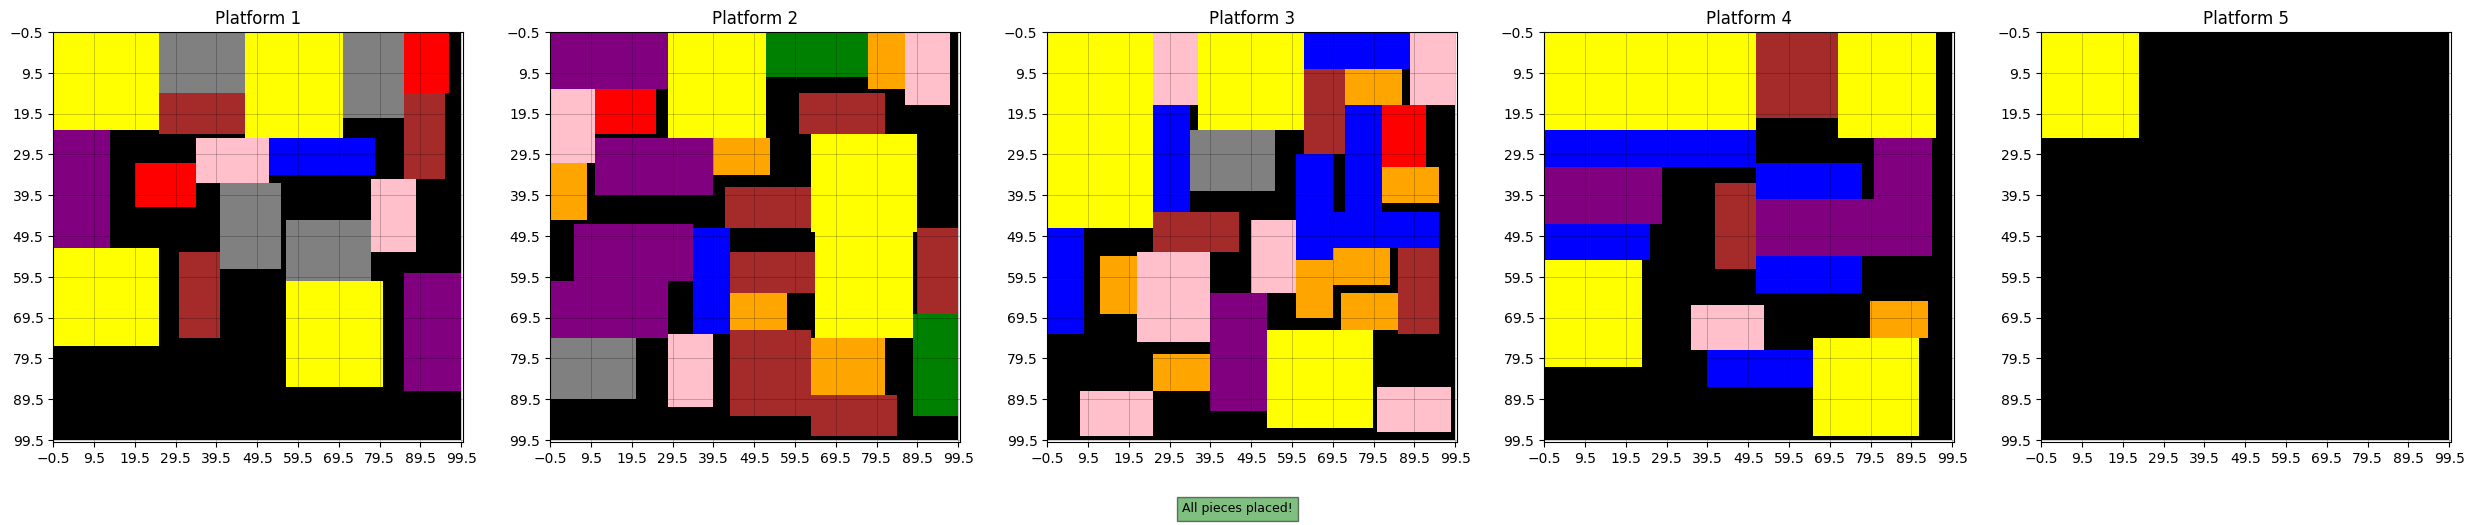

Training:  10%|█         | 100/1000 [07:39<1:33:01,  6.20s/it]


Episode 100
Reward: 19245.00
Waste: 11100
Efficiency: 0.63
Platforms used: 3


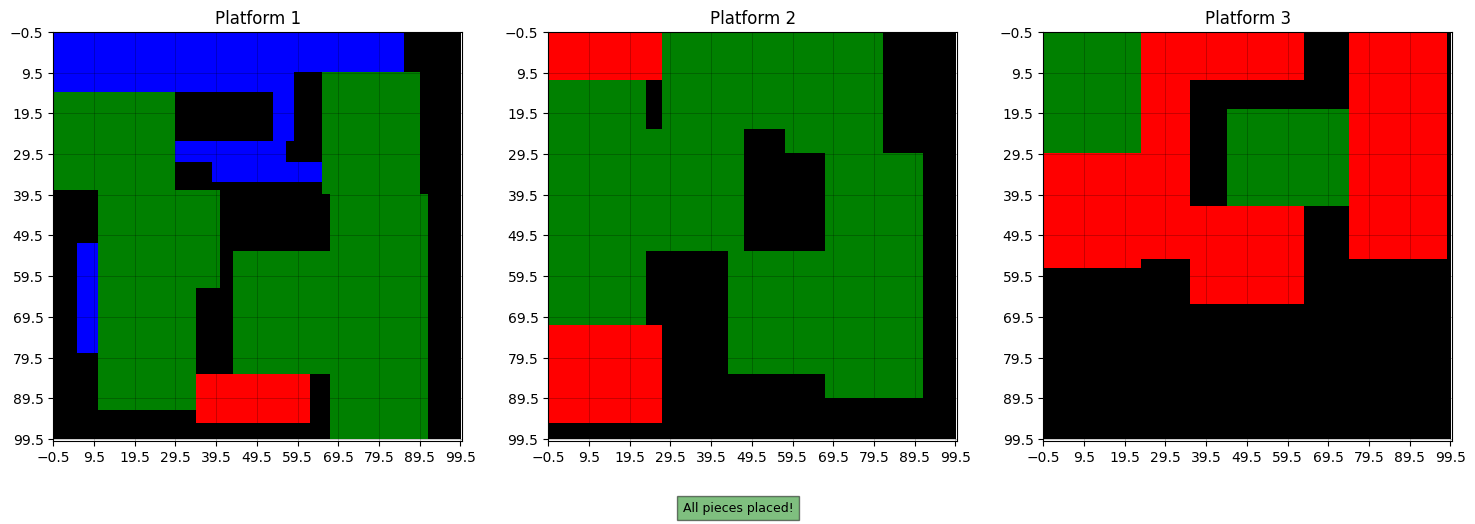

Training:  20%|██        | 200/1000 [15:54<57:11,  4.29s/it]  


Episode 200
Reward: 3136.50
Waste: 7135
Efficiency: 0.29
Platforms used: 1


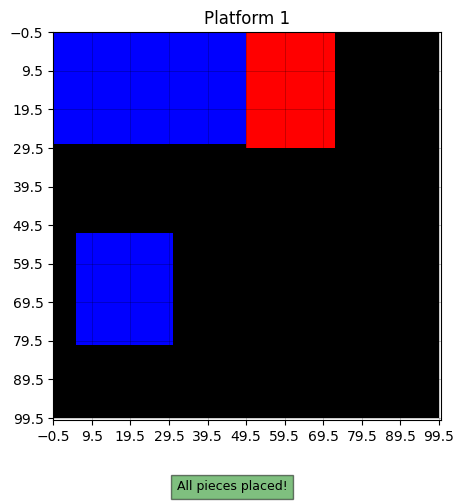

Training:  30%|███       | 300/1000 [25:03<39:50,  3.42s/it]  


Episode 300
Reward: 13227.55
Waste: 7069
Efficiency: 0.65
Platforms used: 2


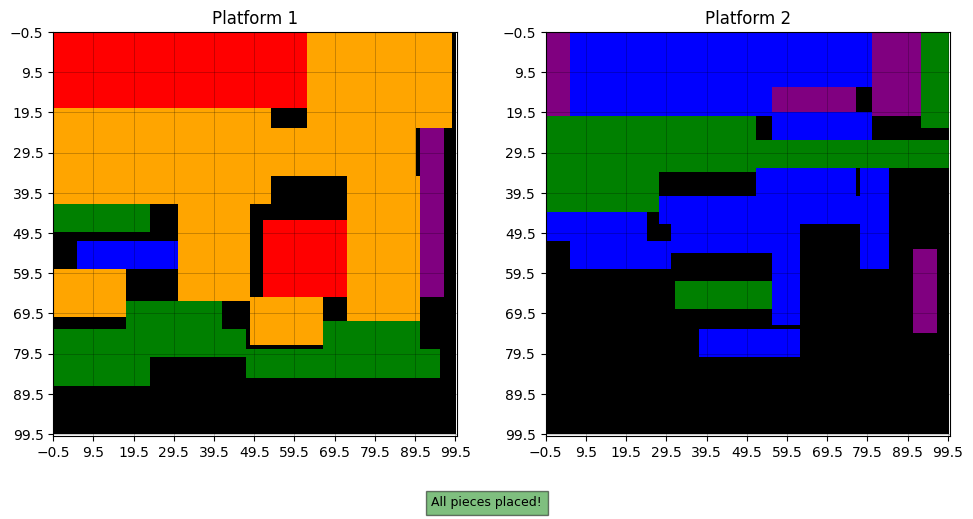

Training:  40%|████      | 400/1000 [33:30<45:40,  4.57s/it]  


Episode 400
Reward: 5460.20
Waste: 4968
Efficiency: 0.50
Platforms used: 1


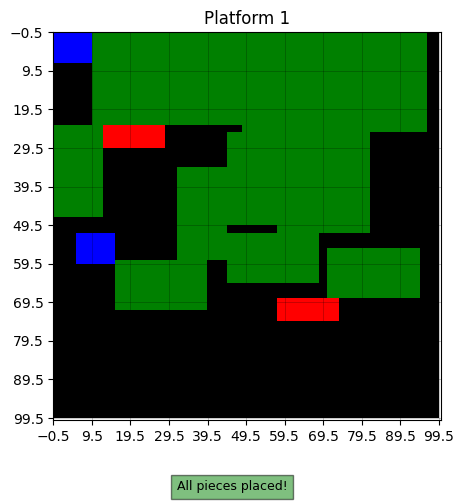

Training:  50%|█████     | 500/1000 [42:32<54:07,  6.49s/it]  


Episode 500
Reward: 24454.43
Waste: 5957
Efficiency: 0.80
Platforms used: 3


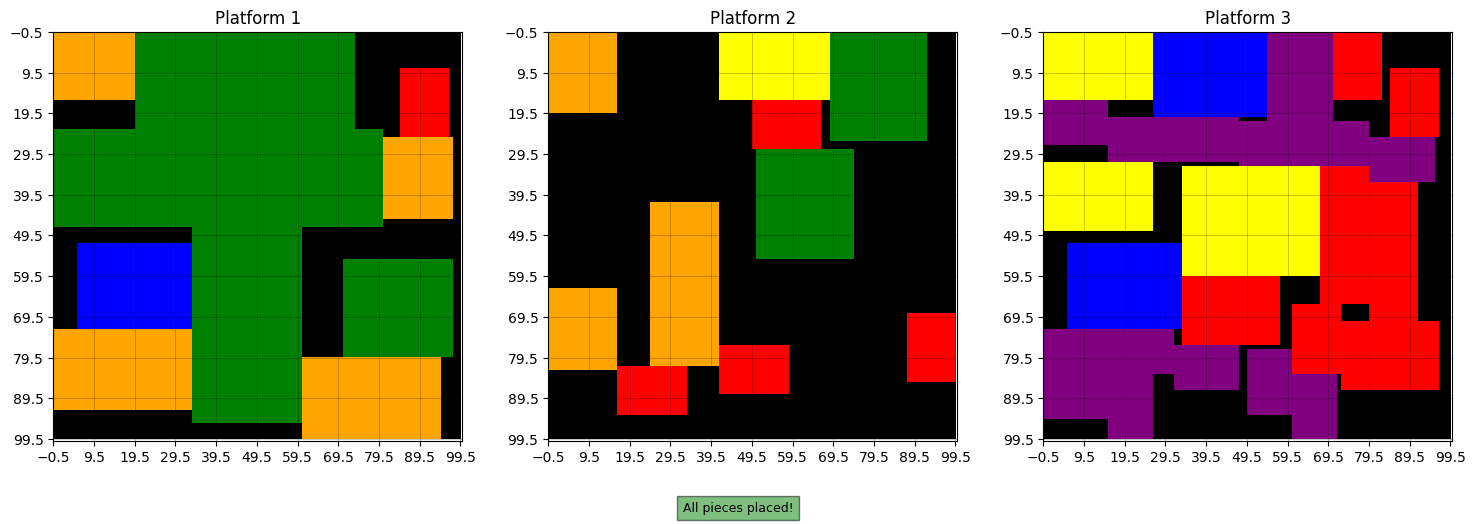

Training:  60%|██████    | 600/1000 [51:28<38:57,  5.84s/it]  


Episode 600
Reward: 35991.96
Waste: 14052
Efficiency: 0.72
Platforms used: 5


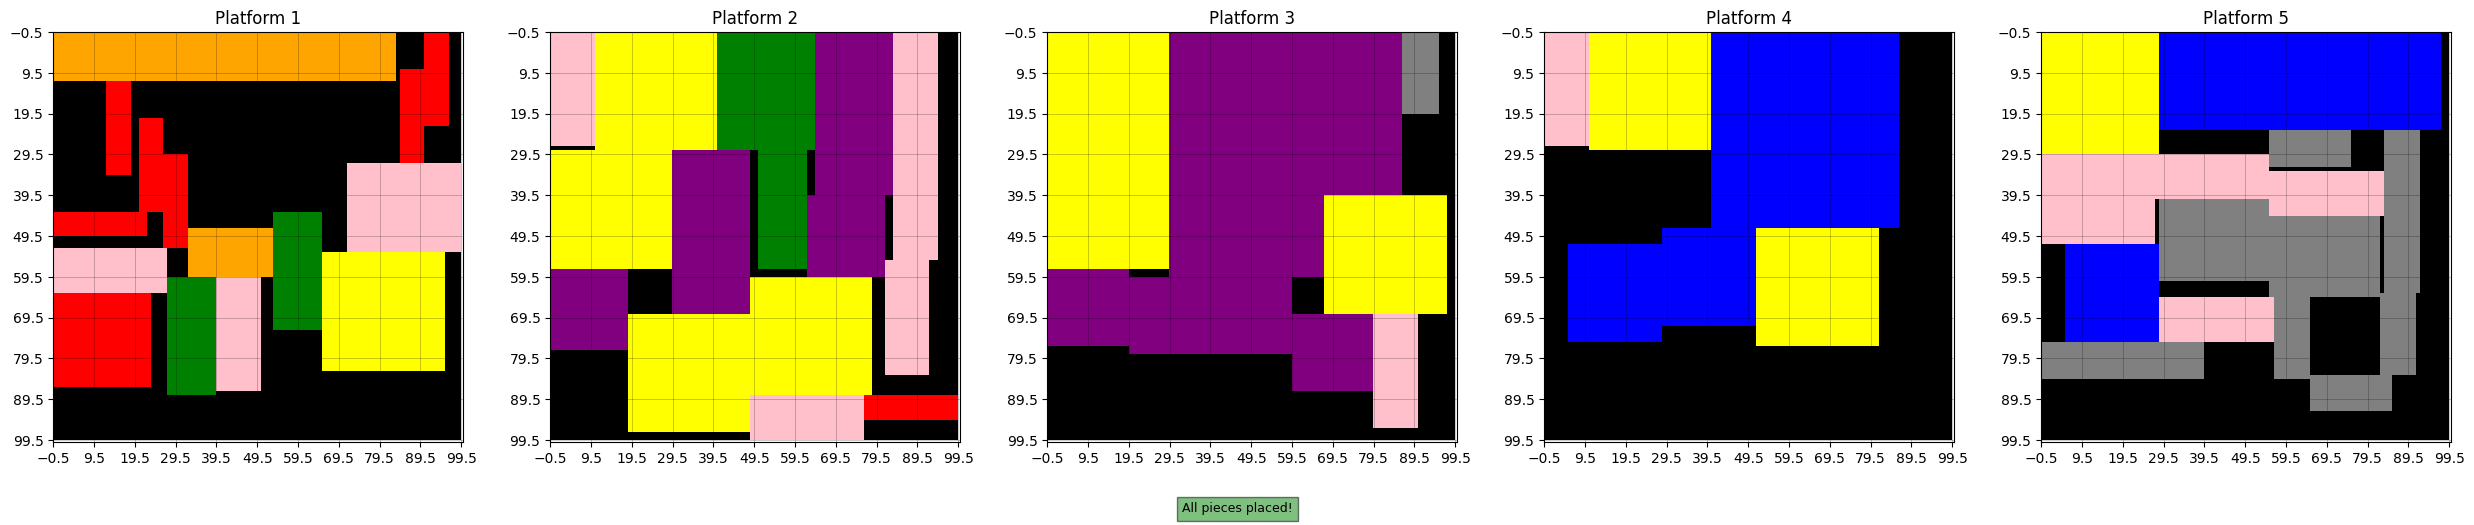

Training:  70%|███████   | 700/1000 [1:00:16<34:19,  6.86s/it]


Episode 700
Reward: 8932.30
Waste: 11374
Efficiency: 0.43
Platforms used: 2


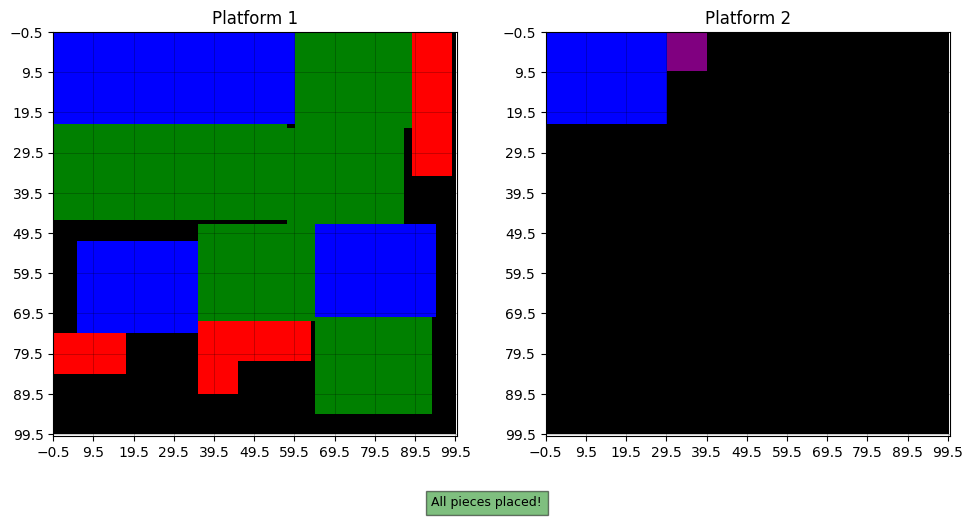

Training:  80%|████████  | 800/1000 [1:08:15<20:11,  6.06s/it]


Episode 800
Reward: 36207.00


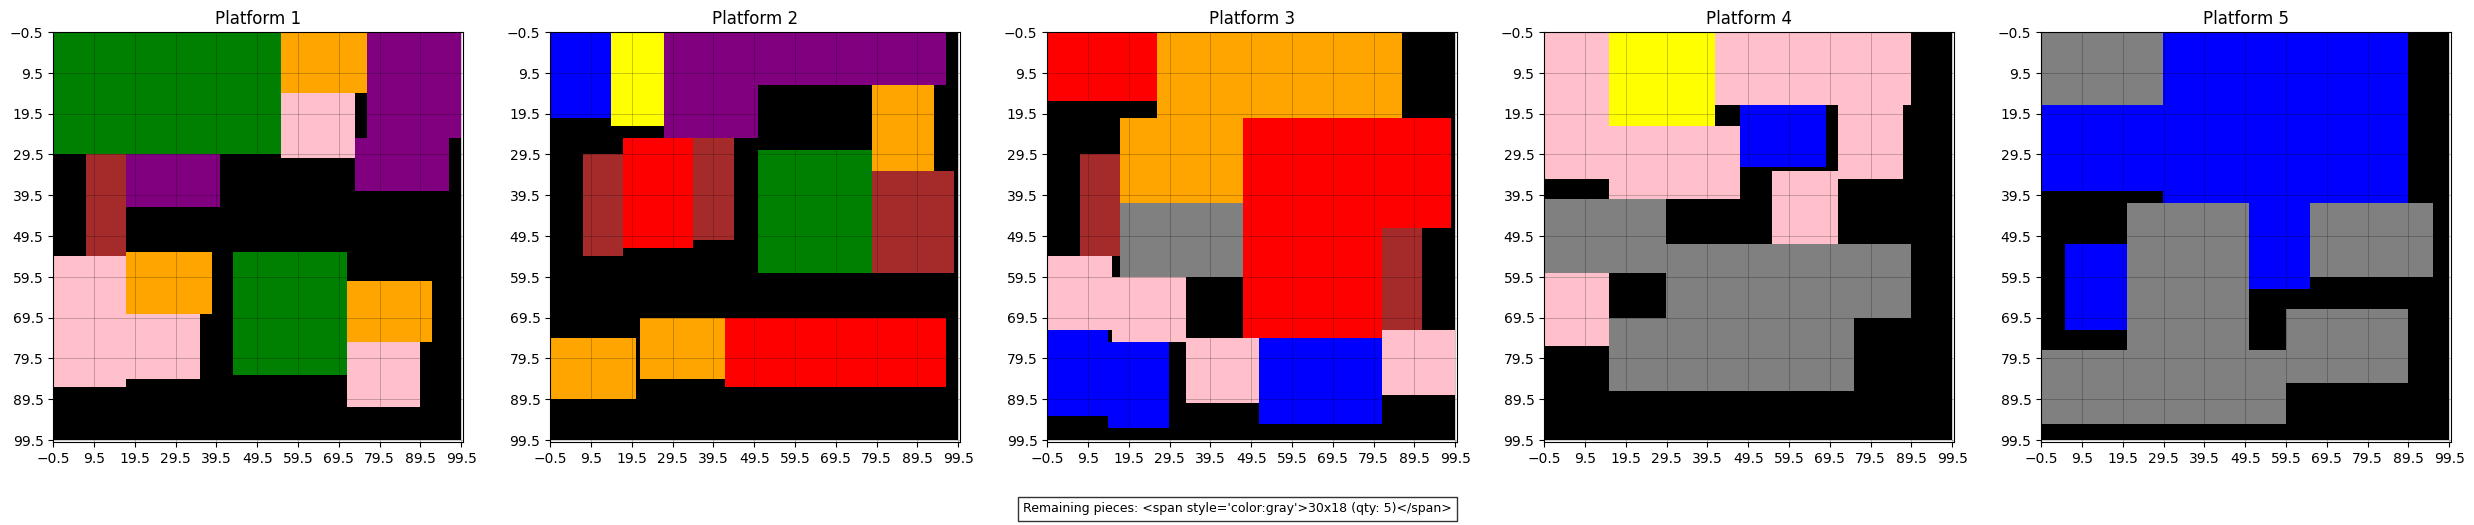

Training:  90%|█████████ | 900/1000 [1:17:19<08:48,  5.29s/it]


Episode 900
Reward: 4351.20
Waste: 5908
Efficiency: 0.41
Platforms used: 1


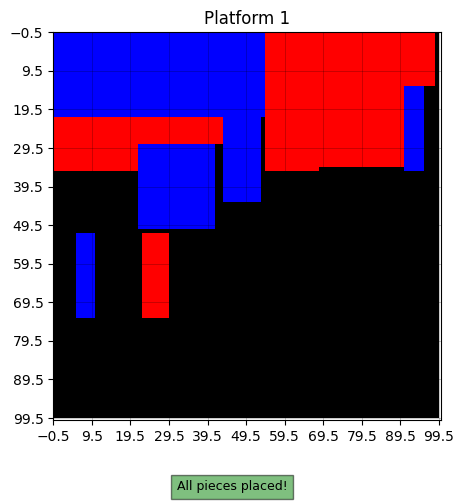

Training: 100%|██████████| 1000/1000 [1:26:25<00:00,  5.19s/it]


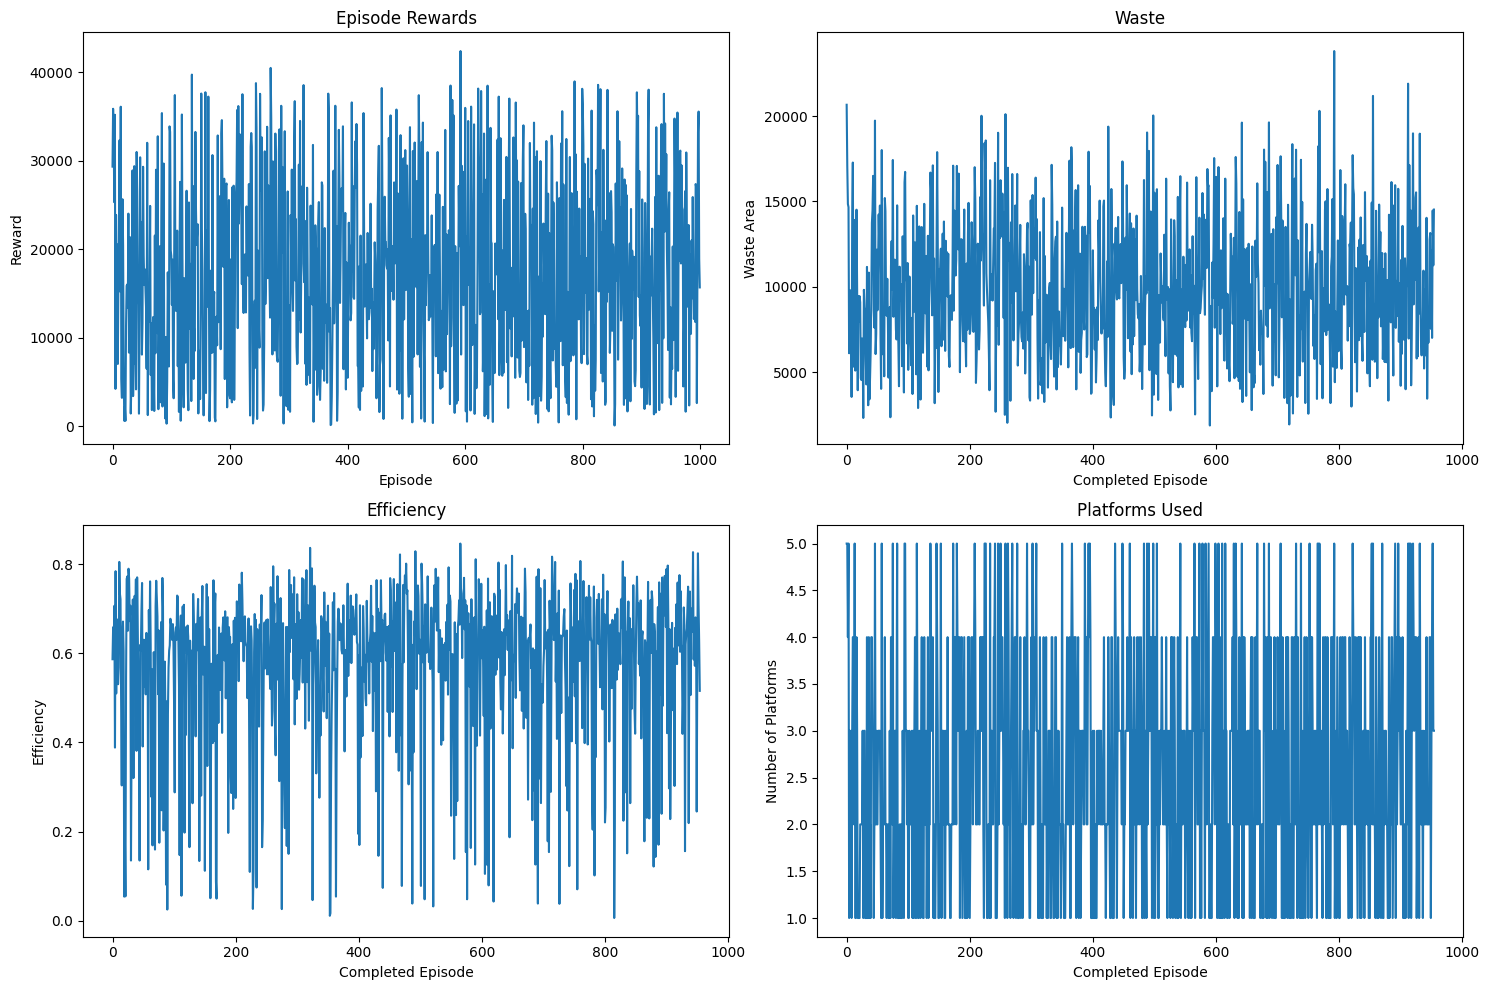

Training completed!


In [4]:
main()